In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas_datareader import data
import math
from matplotlib import style
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
prices= data.DataReader("GOOG", data_source="yahoo", start="2018-01-03" , end="2018-11-20")['Close']

In [27]:
returns= prices.pct_change()
returns.dropna(axis=0, inplace=True)

In [28]:
Num_of_days=252  #standard number of trading days
simulations=500 # number of simulations
lastprice=prices[-1] #last price as the starting point for the simulation

In [29]:
vol = returns.std()

In [30]:
simulation=pd.DataFrame()


In [21]:
for x in range(simulations):
    count=0
    pred_prices=[]  
    next_price= lastprice*(1+np.random.normal(0, vol)) #generate using normal distribution
    pred_prices.append(next_price)
    
    for y in range(Num_of_days):  # generating 252 values for the next trading days
        next_price= pred_prices[count]*(1+np.random.normal(0, vol))
        pred_prices.append(next_price)
        count+=1
        
    simulation[x]=pred_prices #500 simulations
    
    


<function matplotlib.pyplot.show(*args, **kw)>

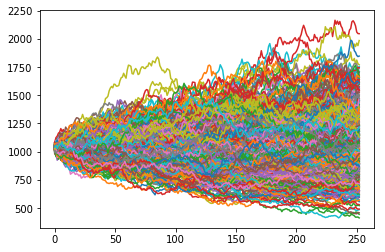

In [24]:
# plot the simulated values
plt.plot(simulation)
plt.show